In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

In [5]:
df=pd.read_csv('/content/drive/MyDrive/anomaly_detection_dataset_500_samples.csv')
df.head()

,Feature_1,Feature_2,Anomaly_Label
0,43.259073,53.716320,0
1,43.815246,43.397717,0
2,46.942411,42.966695,0
3,48.911594,55.493884,0
4,52.575238,69.263657,0


In [6]:
print(df.shape)
df.info()
df.describe()


(500, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Feature_1      500 non-null    float64
 1   Feature_2      500 non-null    float64
 2   Anomaly_Label  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


,Feature_1,Feature_2,Anomaly_Label
count,500.000000,500.000000,500.000000
mean,52.422862,52.573850,0.060000
std,10.600455,10.641964,0.237725
min,33.793663,38.490394,0.000000
25%,47.027724,47.097147,0.000000
50%,50.447020,50.566493,0.000000
75%,53.827497,54.163940,0.000000
max,95.539911,95.402821,1.000000


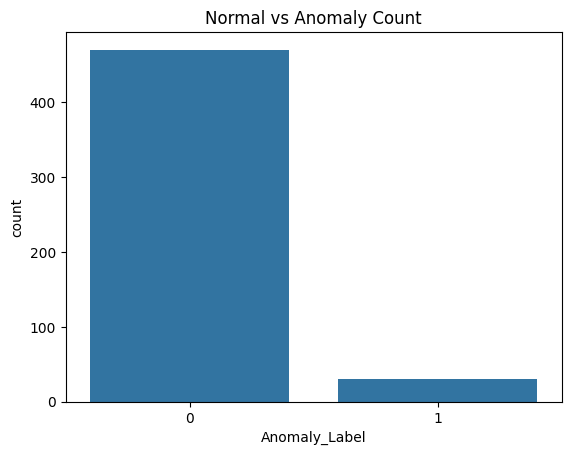

In [8]:
sns.countplot(x="Anomaly_Label",data=df)
plt.title("Normal vs Anomaly Count")
plt.show()

In [9]:
X=df[["Feature_1","Feature_2"]]
y=df["Anomaly_Label"]


In [10]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)


In [12]:
models={
"Isolation Forest":IsolationForest(contamination=0.1,random_state=42),
"Local Outlier Factor":LocalOutlierFactor(novelty=True),
"One-Class SVM":OneClassSVM(nu=0.1)
}


In [13]:
results=[]

for name,model in models.items():
    model.fit(X_train)
    pred=model.predict(X_test)
    pred=np.where(pred==-1,1,0)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    auc=roc_auc_score(y_test,pred)
    results.append([name,acc,pre,rec,f1,auc])

results_df=pd.DataFrame(results,columns=["Model","Accuracy","Precision","Recall","F1","ROC_AUC"])
results_df


,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Isolation Forest,0.97,0.666667,1.000000,0.800,0.984043
1,Local Outlier Factor,0.93,0.000000,0.000000,0.000,0.494681
2,One-Class SVM,0.94,0.500000,0.833333,0.625,0.890071


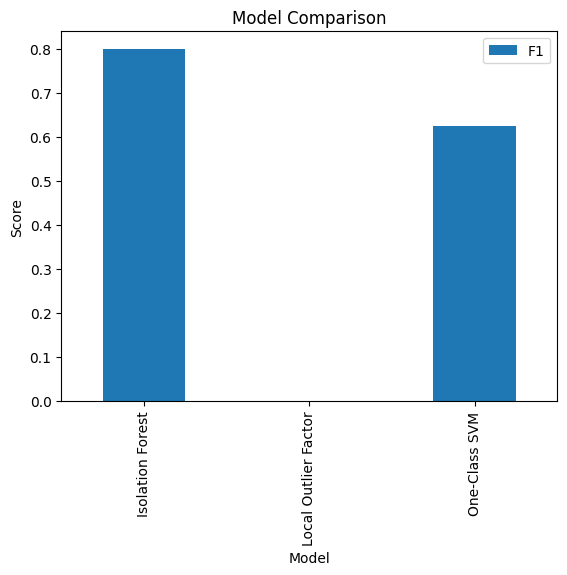

In [14]:
results_df.plot(x="Model",y="F1",kind="bar")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.show()


In [15]:
best_name=results_df.sort_values("F1",ascending=False).iloc[0,0]
best_model=models[best_name]

print("Best Model:",best_name)


Best Model: Isolation Forest


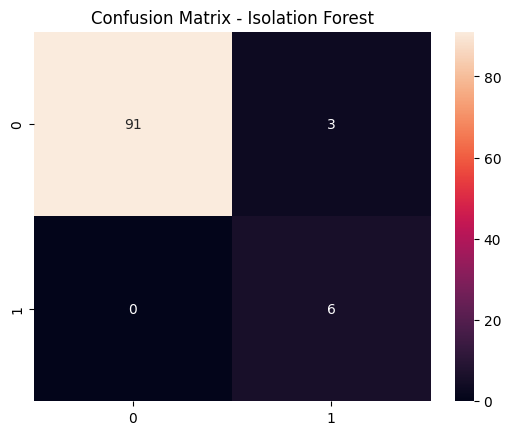

In [16]:
pred=best_model.predict(X_test)
pred=np.where(pred==-1,1,0)

cm=confusion_matrix(y_test,pred)

sns.heatmap(cm,annot=True,fmt='d')
plt.title("Confusion Matrix - "+best_name)
plt.show()
